# Clustering



Clustering is an unsupervised Machine Learning method used for discovering patterns and similarities within data samples. The samples are then clustered into groups based on a high degree of similarity features. Clustering is significant because it ensures the intrinsic grouping among the current unlabeled data.

It can be defined as, "A method of sorting data points into different clusters based on their similarity. The objects with possible similarities are kept in a group with few or no similarities to another."

It accomplishes this by identifying comparable patterns in the unlabeled dataset, such as activity, size, color, and shape, and categorizing them according to the presence or absence of those patterns. The algorithm receives no supervision and works with an unlabeled dataset since it is an unsupervised learning method.

Following the application of the clustering technique, each group or cluster is given a cluster-ID, which the ML system can utilize to facilitate the processing of huge and complicated datasets.

The Scikit-learn library has a function called sklearn.cluster that can cluster unlabeled data.

Now that we understand clustering, let us explore the types of clustering methods in SkLearn.




### Clustering Techniques

- **K-Means clustering**
- **Hierarchical clustering**
- **Mean shift**


For a good understanding of how these algorithms work, watch the videos below:<br>
> **K-Means** $\to$ https://www.youtube.com/watch?v=4b5d3muPQmA&t=385s <br>
> **Hierarchical** $\to$ https://www.youtube.com/watch?v=7xHsRkOdVwo

# Clustering Case Study


We would be working with a dataset for a movie streaming service, which contains information about the movie watching habits of customers such as the number of times they open up the streaming service, number of minutes watched per week, whether they decided to watch the movie recommendations shown to them by the streaming service's recommendation system, and so on.

1he streaming service wants to know more about the customers using the services and have employed you as a data scientist to explore the dataset. We have already discussed some statistical methods with which can help give some statistical insights into the dataset, however, in this case, we would be looking at deriving new pieces of information from the dataset by identifying clusters of people with character traits unique to the cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset from different file formats

#data = pd.read_csv("Movie_Watchers_Data.csv")

data = pd.read_parquet("Movie_Watchers_Data.parquet")

data = pd.read_feather("Movie_Watchers_Data.feather")

In [3]:
data.head()

,user_id,minutes_watched_per_week,total_viewing_sessions_per_week,number_of_unique_shows_viewed,watched_recommendations,mobile_app_usage,fav_movie_type,watched_list
0,162396,1117.116026,13.0,5.91,87.89%,48.36%,Adventure,"[Movie8, Movie13, Movie12, Movie13, Movie12, M..."
1,156561,1031.665279,19.0,5.61,47.16%,11.78%,Action,"[Movie6, Movie15, Movie16, Movie14, Movie16, M..."
2,294204,536.837228,35.0,3.49,44.24%,63.82%,Action,"[Movie7, Movie12, Movie12, Movie14, Movie12, M..."
3,268326,1180.403693,10.0,5.64,66.37%,56.15%,Documentary,"[Movie17, Movie5, Movie5, Movie4]"
4,270090,1180.393369,24.0,4.59,51.59%,27.58%,Horror,"[Movie6, Movie15, Movie15, Movie16]"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50890 entries, 0 to 50889
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          50890 non-null  int64  
 1   minutes_watched_per_week         50890 non-null  float64
 2   total_viewing_sessions_per_week  50890 non-null  float64
 3   number_of_unique_shows_viewed    50890 non-null  float64
 4   watched_recommendations          50890 non-null  object 
 5   mobile_app_usage                 50890 non-null  object 
 6   fav_movie_type                   50890 non-null  object 
 7   watched_list                     50890 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.1+ MB


### Data issues:


**Watched_recommendations and mobile_app_usage** are percentages. But in order to use them for machine learning, they should be written in their decimal representations

In [5]:
#Removing the Percentage signs
data["watched_recommendations"] = data["watched_recommendations"].str.strip("%")


#Converting from strings to floats
data["watched_recommendations"] = data["watched_recommendations"].astype(float)


#Converting to decimal representation
data["watched_recommendations"] = data["watched_recommendations"]/100

In [6]:
data["watched_recommendations"].dtype == float

True

### Don't Repeat Yourself (DRY)


In coding, the **DRY principle** simply makes it clear that we should not repeat similar lines of code when we could have created an object (usually a function) that can perform that operation, and just simply call the object whenever we wanted to make use of the operation.


The preceeding code for converting the watched_recommendations column from an object to float decimal in pandas would be similar to the code used to convert the mobile_app_usage from datatype object to datatype float.

Therefore, we should create a function that can perform this function and use it in both cases.

In [7]:
#Creating the function that will perform the data manipulation
def column_fixer(column_name):
    
    #checking if the column name inputted is correct
    if column_name not in data.columns:
        print("type in the correct column name")
        return None
    
    
    #checking if the column datatype has already been sorted out
    if data[column_name].dtype == float:
        return data[column_name]
    
    
    #Removing the % sign
    data[column_name] = data[column_name].str.strip("%")
    
    
    #Converting from string to float
    data[column_name] = data[column_name].astype(float)
    
    
    #Converting the percentage values to decimal
    data[column_name] = data[column_name]/100
    
    
    return data[column_name]

In [8]:
#Testing our column_fixer function
column_fixer("mobile_app_usage")

0        0.4836
1        0.1178
2        0.6382
3        0.5615
4        0.2758
          ...  
50885    0.1458
50886    0.3124
50887    0.1583
50888    0.2517
50889    0.3010
Name: mobile_app_usage, Length: 50890, dtype: float64

In [9]:
#Applying the function to clean the watched recommendations column
data["watched_recommendations"] = column_fixer("watched_recommendations")

In [10]:
#Applying the function to clean the mobile_app_usage column
data["mobile_app_usage"] = column_fixer("mobile_app_usage")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50890 entries, 0 to 50889
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          50890 non-null  int64  
 1   minutes_watched_per_week         50890 non-null  float64
 2   total_viewing_sessions_per_week  50890 non-null  float64
 3   number_of_unique_shows_viewed    50890 non-null  float64
 4   watched_recommendations          50890 non-null  float64
 5   mobile_app_usage                 50890 non-null  float64
 6   fav_movie_type                   50890 non-null  object 
 7   watched_list                     50890 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


We still need to convert the fav_movie_type column to numbers. This can be done using the Label Encoder class.


### Converting fav_movie_type to numbers

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["fav_movie_type"] = le.fit_transform(data["fav_movie_type"])

In [13]:
data.head()

,user_id,minutes_watched_per_week,total_viewing_sessions_per_week,number_of_unique_shows_viewed,watched_recommendations,mobile_app_usage,fav_movie_type,watched_list
0,162396,1117.116026,13.0,5.91,0.8789,0.4836,1,"[Movie8, Movie13, Movie12, Movie13, Movie12, M..."
1,156561,1031.665279,19.0,5.61,0.4716,0.1178,0,"[Movie6, Movie15, Movie16, Movie14, Movie16, M..."
2,294204,536.837228,35.0,3.49,0.4424,0.6382,0,"[Movie7, Movie12, Movie12, Movie14, Movie12, M..."
3,268326,1180.403693,10.0,5.64,0.6637,0.5615,2,"[Movie17, Movie5, Movie5, Movie4]"
4,270090,1180.393369,24.0,4.59,0.5159,0.2758,3,"[Movie6, Movie15, Movie15, Movie16]"


### Hierarchical Clustering Vs K-Means Clustering:



So far, we have cleaned the dataset a little bit and even though there is no other data inconsistency issue with the dataset, we would still run into a problem if we try to perform Hierarchical or K-means clustering on the dataset.

But before we go into these issues, we should first understand what these two clustering algorithms are and how they work.


### K-Means:

Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.

K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3

Algorithm steps Of K Means

The working of the K-Means algorithm is explained in the below steps:

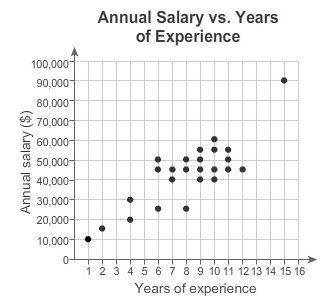

**Step-1**: Select the value of K, to decide the number of clusters to be formed.

**Step-2**: Select random K points which will act as centroids.

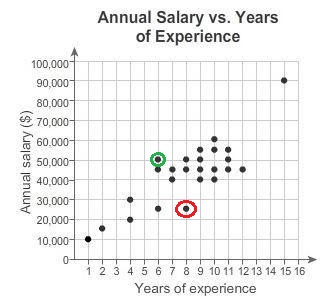

**Step-3**: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

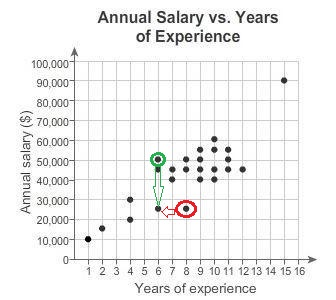

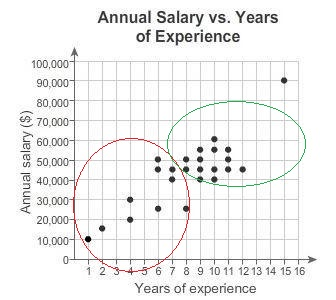

**Step-4**: place a new centroid of each cluster.

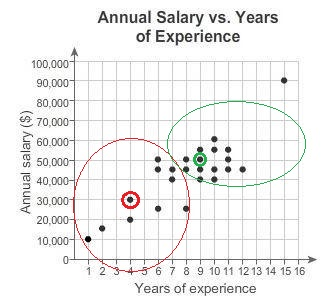

**Step-5**: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster. 

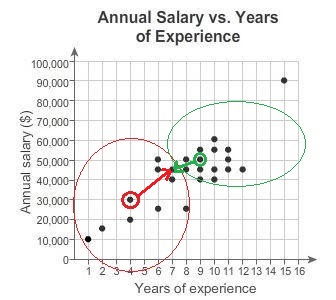

**Step-6**: If any reassignment occurs, then go to step-4 else go to Step 7.

**Step-7**: FINISH

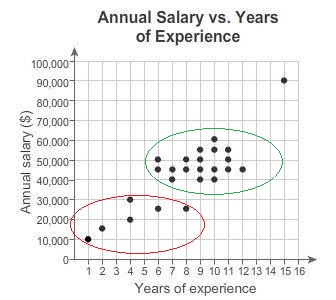

### Homework:

Determine how the Hierarchical clustering algorithm works

#### Benefits of using K-Means
- It is computationally efficient compared to hierarchical clustering and can be used to analyze large data sets. 
- K-means is easier to understand and implement. 


#### Drawbacks
- It is less flexible than hierarchical clustering because it constrains the user to specify the number of clusters beforehand, which may not be obvious in some situations.  
- The result is not stable and changes from one iteration to another for the same data set.
- It is more sensitive to outliers because the use of outliers in the data impacts the mean of the cluster. 
- Both k-means and hierarchical clustering are incapable of handling categorical data directly and may not work well with data that is not continuous or has very large variance.

(Gotten from: https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python)

But before applying Hierarchical or K-Means Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

### Homework:


- What are the two major ways to normalize data and what are the differences between them?
- Other than for clustering algorithms stated here, where else can normalization be used?
- When do you use one normalization technique over the other?

### Normalizing our dataset

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

scaled_data = std.fit_transform(data.iloc[:,:-1])

In [15]:
scaled_data_df = pd.DataFrame(scaled_data, columns = data.iloc[:,:-1].columns)

scaled_data_df.head()

,user_id,minutes_watched_per_week,total_viewing_sessions_per_week,number_of_unique_shows_viewed,watched_recommendations,mobile_app_usage,fav_movie_type
0,0.142065,0.773236,-0.575528,1.276187,2.333268,0.629770,-0.384176
1,0.074680,0.457747,0.120401,0.955891,0.013879,-1.601076,-1.362151
2,1.664235,-1.369188,1.976209,-1.307529,-0.152402,1.572604,-1.362151
3,1.365386,1.006898,-0.923492,0.987921,1.107801,1.104846,0.593799
4,1.385757,1.006860,0.700341,-0.133113,0.266147,-0.637507,1.571775


### Applying K-Means Clustering


As you might imagine, the process described above for the K-Means algorithm can lead to different results on some occasions, especially leading to having different number of clusters.

Thankfully, there is a means to choose the optimal number of clusters. This method is called Within-Cluster-Sum-of-Squares or WCSS. 

The general idea is to reduce the separation between the centroid of the clusters and the datapoints. The distance reduction process goes through a number of iterations until a minimum value for the sum of distances is reached. These sum of squared distances is plotted on a graph on the y-axis while the number of clusters is given on the x-axis. So as the sum of squared distances reduce, the number of clusters increase. As this progresses, there exists a certain number of clusters beyond which a reduction in the sum of squared distance between the datapoints becomes less significant. This is the optimal number of clusters that gives the best separation for each cluster. Also, this optimal point is easily spotted on the graph as a very sharp decline such that it forms an "Elbow" which is the reason behind naming this graphical method the "Elbow Method".

#### Finding the Optimal Number of Clusters


To find the optimal value of clusters, the elbow method follows the below steps:
1. Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

2. For each value of K, calculates the WCSS value.

3. Plots a graph/curve between WCSS values and the respective number of clusters K.

4. The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

Text(0, 0.5, 'WCSS')

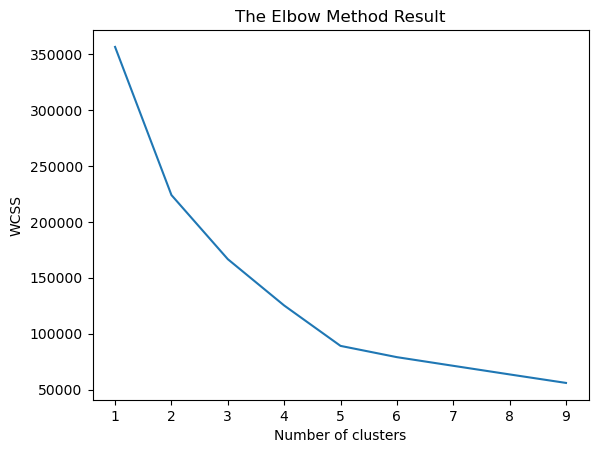

In [16]:
from sklearn.cluster import KMeans



wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_data)
    
    sum_of_squares = kmeans.inertia_
    
    wcss.append(sum_of_squares)
    

num_of_clusters = range(1,10)

sns.lineplot(data = scaled_data, x = num_of_clusters, y = wcss)
plt.title('The Elbow Method Result')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
    

The above graph shows us that there are about 4 to 5 clusters within the dataset. We can deduce this because the sum of squares value stops decreasing significantly after 5 clusters. Also, from 4 to 5, the decrease in the sum of squares was less significant compared to prior cluster numbers, however, it is still significant enough to consider.

### Applying Hierarchical Clustering

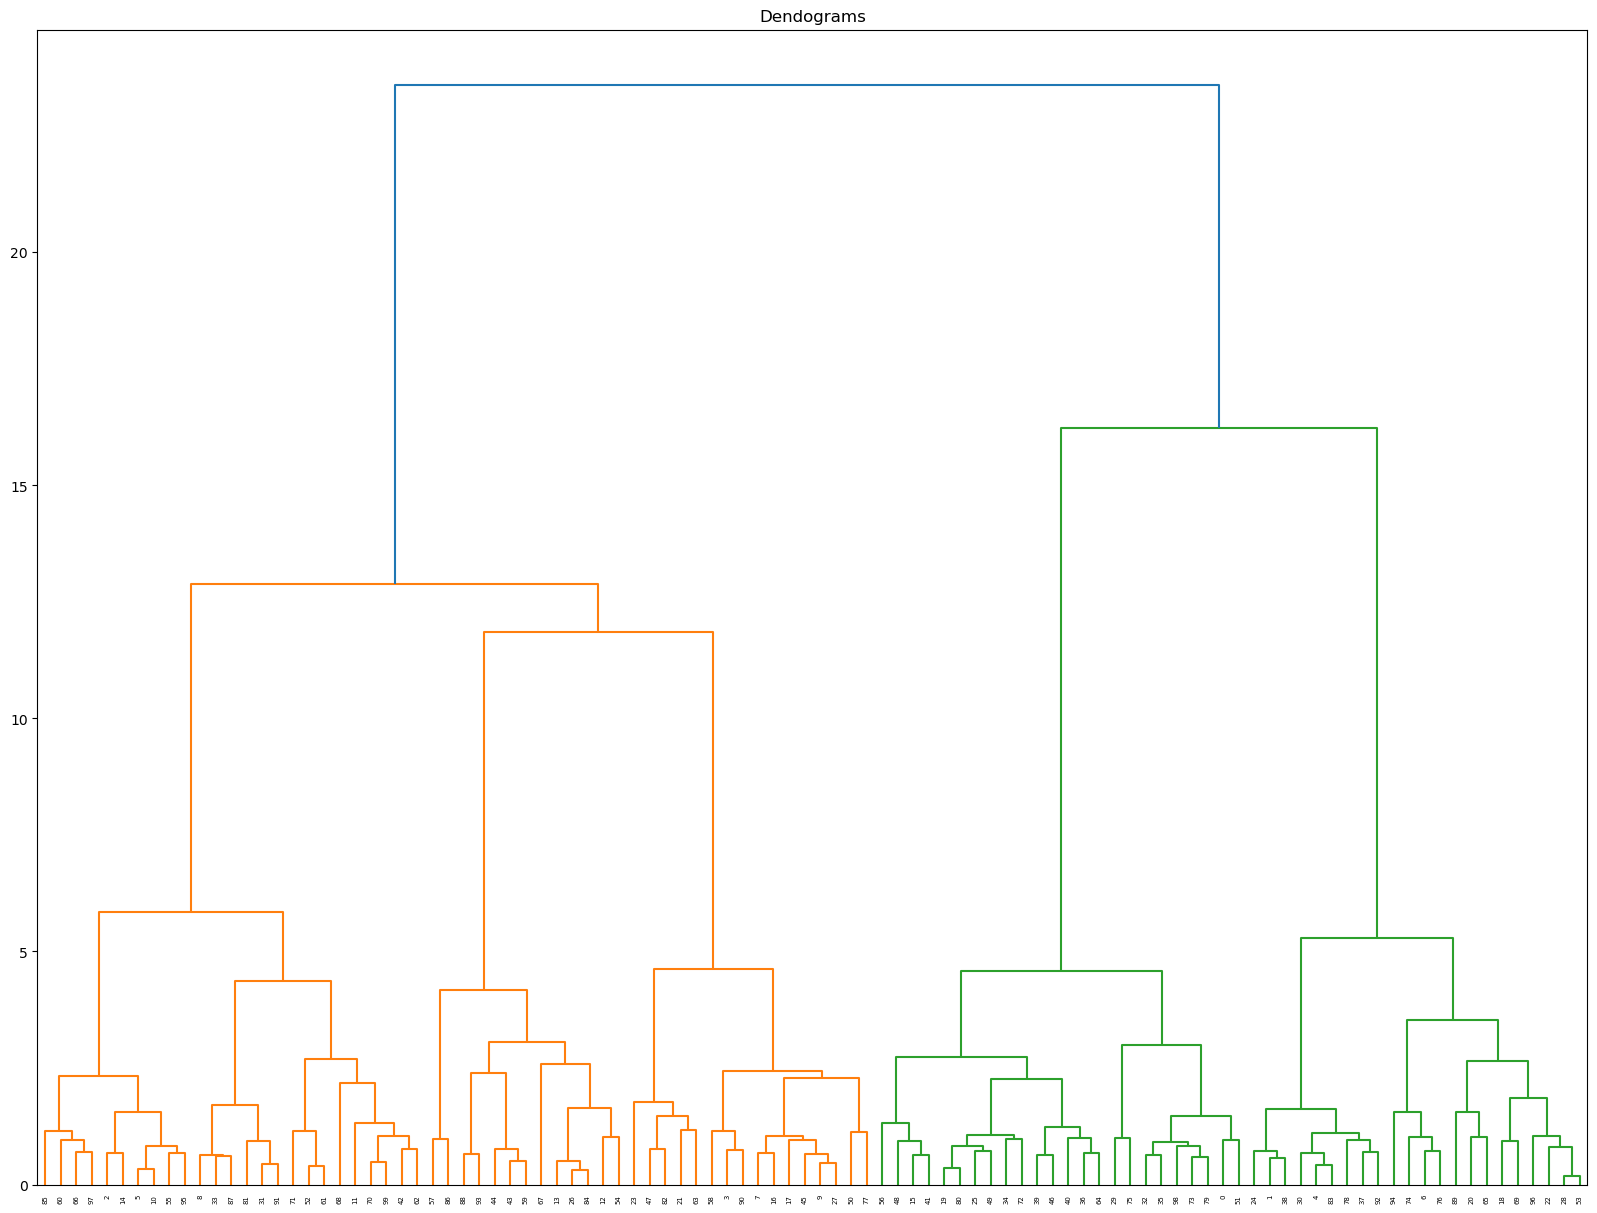

In [17]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20,15))

plt.title("Dendograms")

dend = sch.dendrogram(sch.linkage(scaled_data_df.sample(100), method='ward'))



For each linkage approach, how the dendrogram is constructed and every data point ends up into a single cluster. 

- The x-axis of the dendrogram represents the samples in the data.
- The y-axis represents the distance between those samples. The higher the line, the more dissimilar are those samples/clusters.
- We get the appropriate number of clusters by drawing a horizontal line through that highest vertical line, and the number of intersections corresponds to the number of clusters. 

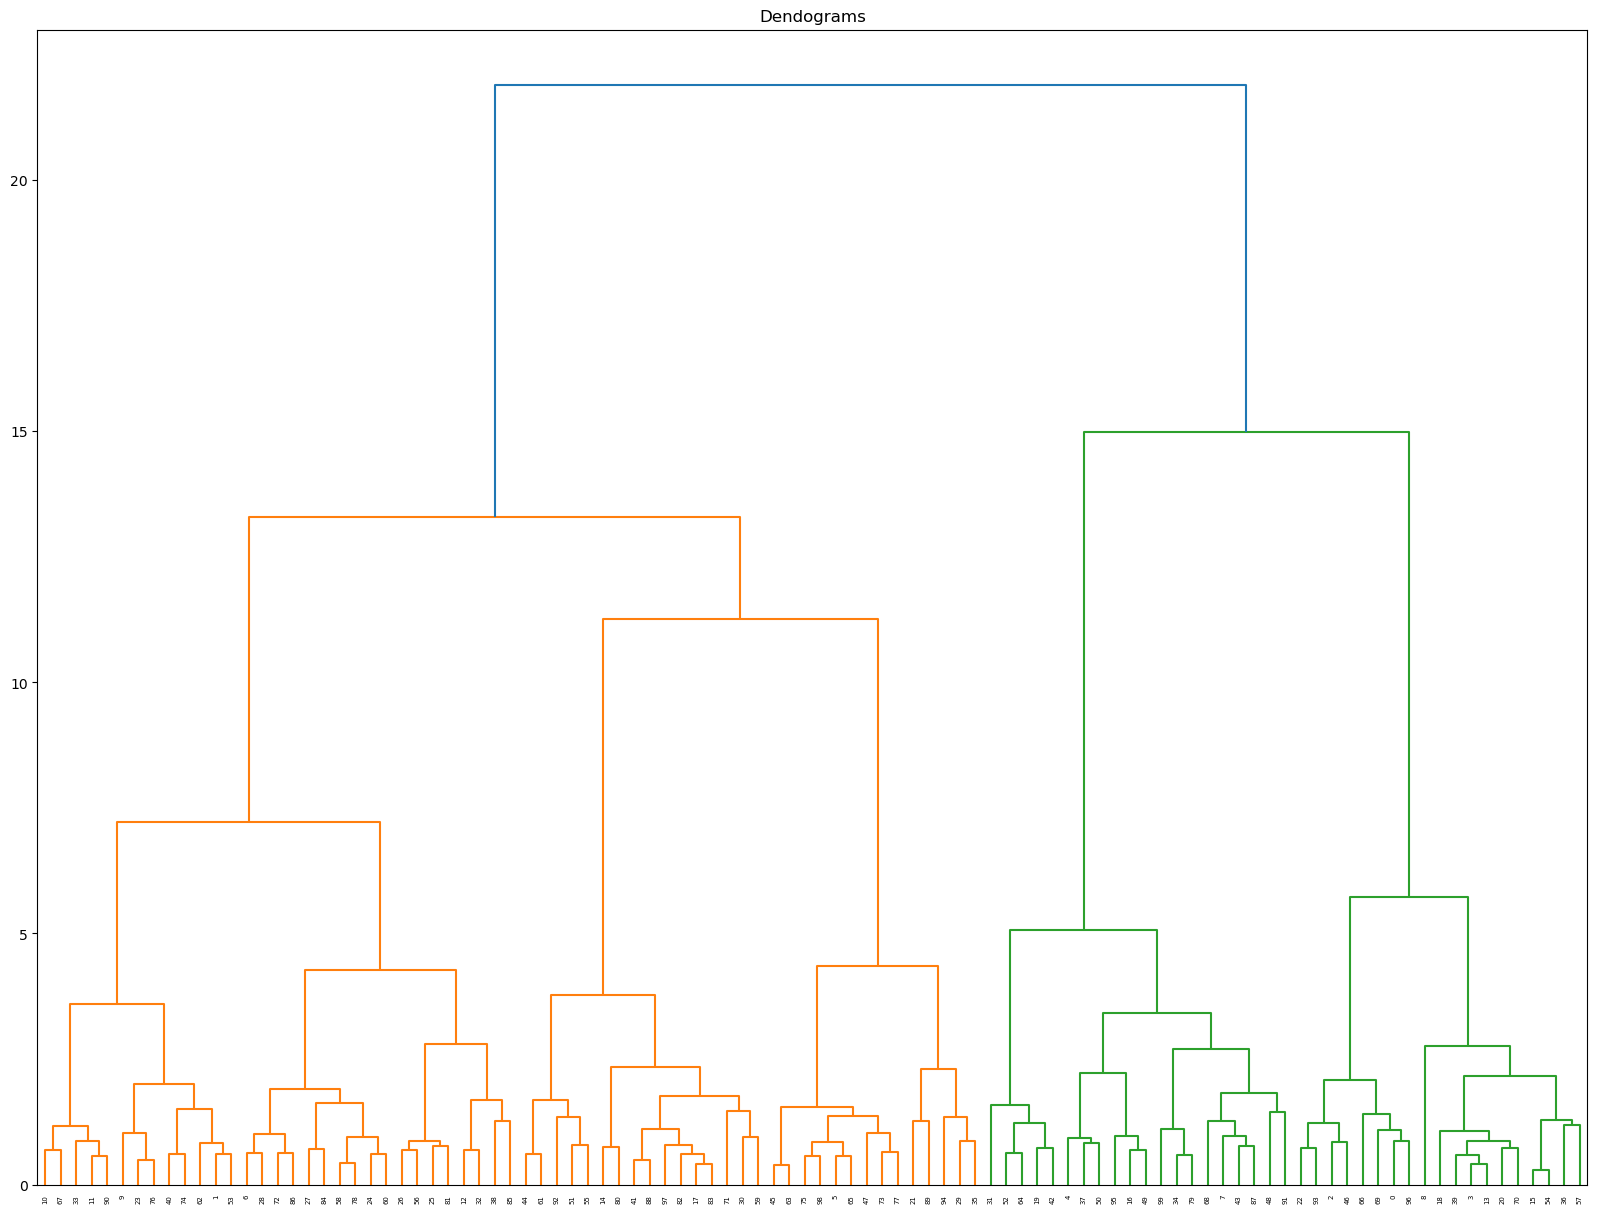

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20,15))

plt.title("Dendograms")

dend = sch.dendrogram(sch.linkage(scaled_data_df.sample(100), method='ward'))

plt.axhline(y=60, color='r', linestyle='--')


In [19]:
#from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
#cluster.fit_predict(scaled_data)

Now, we can simply use the "cluster" object just created to categorize people into any of the available clusters

In [20]:
#cluster.n_clusters_

#### Generating Scatterplots and Pairplots to visualize the data better


First, we visualize with the scaled data, with which the clustering was done. Then, we visualize with the actual values for better interpretation.

In [21]:
#plt.figure(figsize=(10, 7))  
#plt.scatter(scaled_data_df['minutes_watched_per_week'], scaled_data_df['total_viewing_sessions_per_week'], c=cluster.labels_) 

In [22]:
#sns.scatterplot(data = data, x = 'minutes_watched_per_week', y = 'total_viewing_sessions_per_week', hue = cluster.labels_)

In [23]:
#sns.pairplot(data = data)

After generating the above pairplot, we can simply look out for the feature pairings that maximize the distance between each clusters because they would tell us the most information about the various customers using the streaming service.

In [24]:
data.head()

,user_id,minutes_watched_per_week,total_viewing_sessions_per_week,number_of_unique_shows_viewed,watched_recommendations,mobile_app_usage,fav_movie_type,watched_list
0,162396,1117.116026,13.0,5.91,0.8789,0.4836,1,"[Movie8, Movie13, Movie12, Movie13, Movie12, M..."
1,156561,1031.665279,19.0,5.61,0.4716,0.1178,0,"[Movie6, Movie15, Movie16, Movie14, Movie16, M..."
2,294204,536.837228,35.0,3.49,0.4424,0.6382,0,"[Movie7, Movie12, Movie12, Movie14, Movie12, M..."
3,268326,1180.403693,10.0,5.64,0.6637,0.5615,2,"[Movie17, Movie5, Movie5, Movie4]"
4,270090,1180.393369,24.0,4.59,0.5159,0.2758,3,"[Movie6, Movie15, Movie15, Movie16]"


### Assignment

Use the techniques taught in this notebook to analyze the hotel_bookings.csv file and see which insights you can come up with